In [ ]:
import pandas as pd
import re

In [ ]:
# Load the dataset

df = pd.read_csv('/content/Combined Data.csv')
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [ ]:
#Drop 'Unnamed: 0' only if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
    print(" Removed 'Unnamed: 0' column.")
else:
    print(" 'Unnamed: 0' column not found — skipping.")

 Removed 'Unnamed: 0' column.


In [ ]:
# Remove rows with missing 'statement' values
df = df.dropna(subset=['statement'])
print(f" After removing empty text rows: {len(df)} rows left.")


 After removing empty text rows: 52681 rows left.


In [ ]:
df.isnull().sum()

,0
statement,0
status,0


In [ ]:
# Clean the text: lowercase, remove links, numbers, punctuation, etc.

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text


In [ ]:
#Apply cleaning to each sentence
df['cleaned_text'] = df['statement'].apply(clean_text)




/tmp/ipython-input-4007329753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['statement'].apply(clean_text)


In [ ]:
#Show some cleaned examples
print("\nSample cleaned data:")
print(df[['statement', 'cleaned_text', 'status']].head())


Sample cleaned data:
                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                        cleaned_text   status  
0                                         oh my gosh  Anxiety  
1  trouble sleeping confused mind restless heart ...  Anxiety  
2  all wrong back off dear forward doubt stay in ...  Anxiety  
3  ive shifted my focus to something else but im ...  Anxiety  
4  im restless and restless its been a month now ...  Anxiety  


In [ ]:
#Text Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources (only first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer  = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return " ".join(lemmatized)

df['processed_text'] = df['cleaned_text'].apply(preprocess_text)

# 🔹 Display sample results
print("\n✅ Sample after full preprocessing:")
print(df[['cleaned_text', 'processed_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



✅ Sample after full preprocessing:
                                        cleaned_text  \
0                                         oh my gosh   
1  trouble sleeping confused mind restless heart ...   
2  all wrong back off dear forward doubt stay in ...   
3  ive shifted my focus to something else but im ...   
4  im restless and restless its been a month now ...   

                                      processed_text  
0                                            oh gosh  
1     trouble sleep confuse mind restless heart tune  
2  wrong back dear forward doubt stay restless re...  
3      ive shift focus something else im still worry  
4                im restless restless month boy mean  


/tmp/ipython-input-1229043651.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['cleaned_text'].apply(preprocess_text)


In [ ]:
!pip install wordcloud

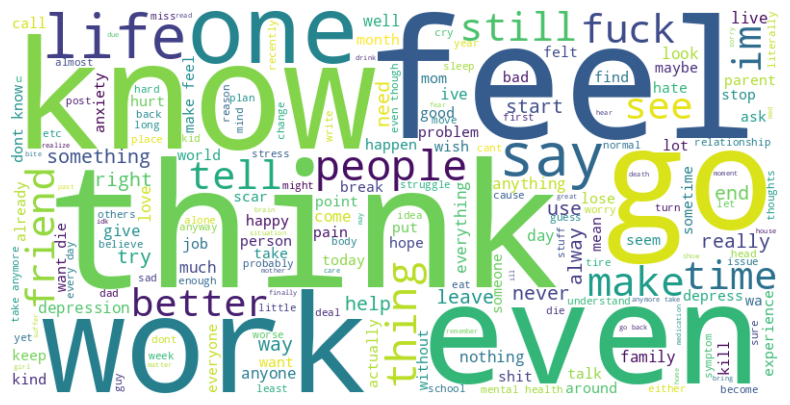

In [ ]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example: assuming you have a text column in a DataFrame named 'text'
# Combine all text into one string
text_data = " ".join(df['processed_text'].astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Encode labels
from sklearn.preprocessing import LabelEncoder

# Encode text labels (like "positive", "negative") to numbers
le = LabelEncoder()
df['encoded_status'] = le.fit_transform(df['status'])

print("✅ Encoded labels:")
print(df[['status', 'encoded_status']].drop_duplicates())


✅ Encoded labels:
                     status  encoded_status
0                   Anxiety               0
733                  Normal               3
6982             Depression               2
6985               Suicidal               6
27346                Stress               5
45394               Bipolar               1
50654  Personality disorder               4


/tmp/ipython-input-3758477831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_status'] = le.fit_transform(df['status'])


In [ ]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X = tfidf.fit_transform(df['processed_text'])  # features
y = df['encoded_status']                       # target

print("✅ TF-IDF shape:", X.shape)


✅ TF-IDF shape: (52681, 3000)


In [ ]:
#Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Training samples:", X_train.shape[0])
print("✅ Testing samples:", X_test.shape[0])


✅ Training samples: 42144
✅ Testing samples: 10537


In [ ]:
#Train ML models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"✅ {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, preds, target_names=le.classes_))



🔹 Training Naive Bayes...
✅ Naive Bayes Accuracy: 0.69
                      precision    recall  f1-score   support

             Anxiety       0.76      0.64      0.69       768
             Bipolar       0.86      0.58      0.70       556
          Depression       0.57      0.78      0.66      3081
              Normal       0.80      0.85      0.82      3269
Personality disorder       0.93      0.17      0.29       215
              Stress       0.71      0.14      0.23       517
            Suicidal       0.70      0.56      0.62      2131

            accuracy                           0.69     10537
           macro avg       0.76      0.53      0.57     10537
        weighted avg       0.71      0.69      0.68     10537


🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.73
                      precision    recall  f1-score   support

             Anxiety       0.80      0.73      0.76       768
             Bipolar       0.87      0.63      0.73       556
          De

In [ ]:
#Test with new unseen text
# pick the model that gave best accuracy
best_model = models["Naive Bayes"]  # or "SVM" / "Random Forest"

new_text = ["I am feeling very happy and excited today!"]
processed = preprocess_text(new_text[0])
vector = tfidf.transform([processed])
prediction = best_model.predict(vector)[0]

print("\n🧠 Input:", new_text[0])
print("💡 Predicted label:", le.inverse_transform([prediction])[0])



🧠 Input: I am feeling very happy and excited today!
💡 Predicted label: Normal


In [ ]:
# ============================================================
# 🔹 1. IMPORT LIBRARIES
# ============================================================
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# ============================================================
# 🔹 2. PREPARE DATA
# ============================================================
# Assuming your DataFrame is called df and has:
# df['processed_text'] (text data)
# df['status'] (labels)

# Label encoding
le = LabelEncoder()
df['encoded_status'] = le.fit_transform(df['status'])
num_classes = len(le.classes_)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'],
    df['encoded_status'],
    test_size=0.2,
    random_state=42
)

# ============================================================
# 🔹 3. TOKENIZE AND PAD TEXT
# ============================================================
vocab_size = 10000     # number of unique words to consider
max_len = 100          # max number of tokens per text

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# ============================================================
# 🔹 4. ONE-HOT ENCODE TARGETS
# ============================================================
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# ============================================================
# 🔹 5. BUILD GRU MODEL
# ============================================================
model_gru = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(num_classes, activation='softmax')
])

model_gru.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_gru.summary()

# ============================================================
# 🔹 6. TRAIN THE MODEL
# ============================================================
print("\n🔹 Training GRU model...")
history = model_gru.fit(
    X_train_pad,
    y_train_cat,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# ============================================================
# 🔹 7. EVALUATE THE MODEL
# ============================================================
print("\n🔹 Evaluating GRU model...")
gru_preds = model_gru.predict(X_test_pad)
gru_preds_classes = np.argmax(gru_preds, axis=1)

# Accuracy
acc = accuracy_score(y_test, gru_preds_classes)
print(f"\n✅ GRU Accuracy: {acc:.2f}")

# Detailed Report
print(classification_report(y_test, gru_preds_classes, target_names=le.classes_))



/tmp/ipython-input-2281501602.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_status'] = le.fit_transform(df['status'])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


🔹 Training GRU model...
Epoch 1/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 187s 307ms/step - accuracy: 0.4655 - loss: 1.4015 - val_accuracy: 0.6828 - val_loss: 0.7815
Epoch 2/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 187s 315ms/step - accuracy: 0.7318 - loss: 0.6804 - val_accuracy: 0.7454 - val_loss: 0.6388
Epoch 3/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 196s 306ms/step - accuracy: 0.7960 - loss: 0.5249 - val_accuracy: 0.7518 - val_loss: 0.6289
Epoch 4/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 202s 306ms/step - accuracy: 0.8338 - loss: 0.4264 - val_accuracy: 0.7530 - val_loss: 0.6482
Epoch 5/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 202s 306ms/step - accuracy: 0.8663 - loss: 0.3554 - val_accuracy: 0.7442 - val_loss: 0.7141

🔹 Evaluating GRU model...
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step

✅ GRU Accuracy: 0.76
                      precision    recall  f1-score   support

             Anxiety       0.82      0.78      0.80       755
             Bipolar       0.80      0.80      0.80       527
          Depression       0.69      0.71

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'])
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(df['processed_text'])

# Pad sequences
max_len = max([len(x) for x in sequences])
X_pad = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare target variable for deep learning
num_classes = len(le.classes_)
y_cat = to_categorical(df['encoded_status'], num_classes=num_classes)

# Split padded data
X_train_pad, X_test_pad, y_train_cat, y_test_cat = train_test_split(
    X_pad, y_cat, test_size=0.2, random_state=42, stratify=y # stratify using the original y
)

print(f"✅ Vocab size: {vocab_size}")
print(f"✅ Max sequence length: {max_len}")
print(f"✅ Number of classes: {num_classes}")
print(f"✅ Padded training data shape: {X_train_pad.shape}")
print(f"✅ Padded testing data shape: {X_test_pad.shape}")
print(f"✅ Categorical training labels shape: {y_train_cat.shape}")
print(f"✅ Categorical testing labels shape: {y_test_cat.shape}")